In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
import cv2

In [2]:
img_dir = [y for x in os.walk('D:/DH/NetData/Set3') for y in glob(os.path.join(x[0], '*.png'))]

In [103]:
# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
img_idx = 200
img = cv2.imread(img_dir[img_idx])


# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 3)
#thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 2)
thresh_not = cv2.bitwise_not(thresh)

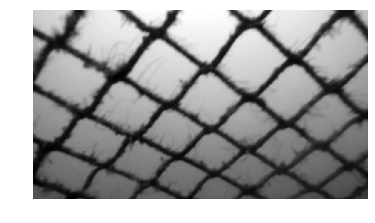

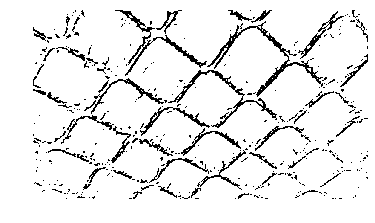

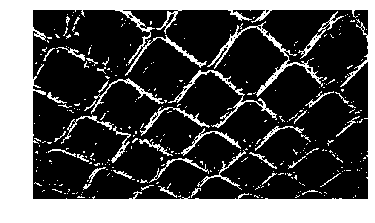

In [104]:
plt.axis("off")
plt.imshow(blurred, cmap='gray')
plt.show()

plt.axis("off")
plt.imshow(thresh, cmap='gray')
plt.show()

plt.axis("off")
plt.imshow(thresh_not, cmap='gray')
plt.show()

In [105]:
# thera, rho
def lineEqPolar(theta, rho, width):
    
    xi = 0
    xf = width
    
    if np.sin(theta)==0:
        xi = 0
        yi = rho
        xf = 0
        yf = rho
        
    else:
        slope = -(np.cos(theta)/np.sin(theta))
        res = rho/np.sin(theta)

        yi = int(slope*xi + res)
        yf = int(slope*xf + res)
    
    return [xi, yi, xf, yf]

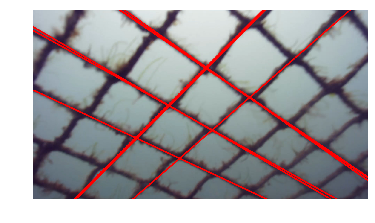

In [109]:
lines = cv2.HoughLines(thresh_not, 1, np.pi/180, 500)
img_show = img.copy()
if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        width = img.shape[1]
        
        l = lineEqPolar(theta, rho, width)
        cv2.line(img_show, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

plt.axis("off")
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [31]:
print(lines.shape)

(43, 1, 2)
